In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [49]:
df = pd.read_csv("newyork_crime_2013.csv").dropna()


In [68]:
#convert from str to int
#df["Population"] = df["Population"].str.replace(",", "")

#df["PopulationSq"] = np.square(pd.to_numeric(df["Population"]))
#df["PopulationSq"] = float(df["Population"]) ** 2
#df["Aggravated\nassault"] = pd.to_numeric(df["Aggravated\nassault"].str.replace(",", ""))
df["Burglary"] = pd.to_numeric(df["Burglary"].str.replace(",", ""))
df["Larceny-\ntheft"] = pd.to_numeric(df["Larceny-\ntheft"].str.replace(",", ""))

In [40]:
df["Murder"] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1,0)

In [41]:
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson',
 'PopulationSq',
 'Murder']

In [51]:
df["Property\ncrime"] = df["Property\ncrime"].str.replace(",", "")
df["Property\ncrime"] = pd.to_numeric(df["Property\ncrime"])

In [43]:
df["RobberyOH"] = np.where(pd.to_numeric(df["Robbery"].str.replace(",", "")) > 0, 1, 0)

In [70]:
#feature engineering
#from the last assignment, we put together the features population, population squared, murder (binary), burglary(binary  )
#I ended up dropping the one hots and added more from the dataset. We were able to explain all of the variance which was a
# little bit scary since that usually leads to overfitting. However, our holdout group looked good as well.

#linear regression
#df["Property\ncrime"] = df["Property\ncrime"].str.replace(",","") 

from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = df["Property\ncrime"].values.reshape(-1, 1)

X = df[["Population", "PopulationSq", "Arson", "Robbery", "Motor\nvehicle\ntheft", "Burglary", "Larceny-\ntheft"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

print(regr.fit(X_train, y_train).score(X_test, y_test))

print(regr.fit(X, Y).score(X, Y))

1.0
1.0


In [52]:
#we went from .77 to .96
#create some new interactions
df["Violent\ncrime"] = df["Violent\ncrime"].str.replace(",", "")
df["ViolentCrime_Robbery"] = pd.to_numeric(df["Violent\ncrime"])* pd.to_numeric(df["Robbery"])

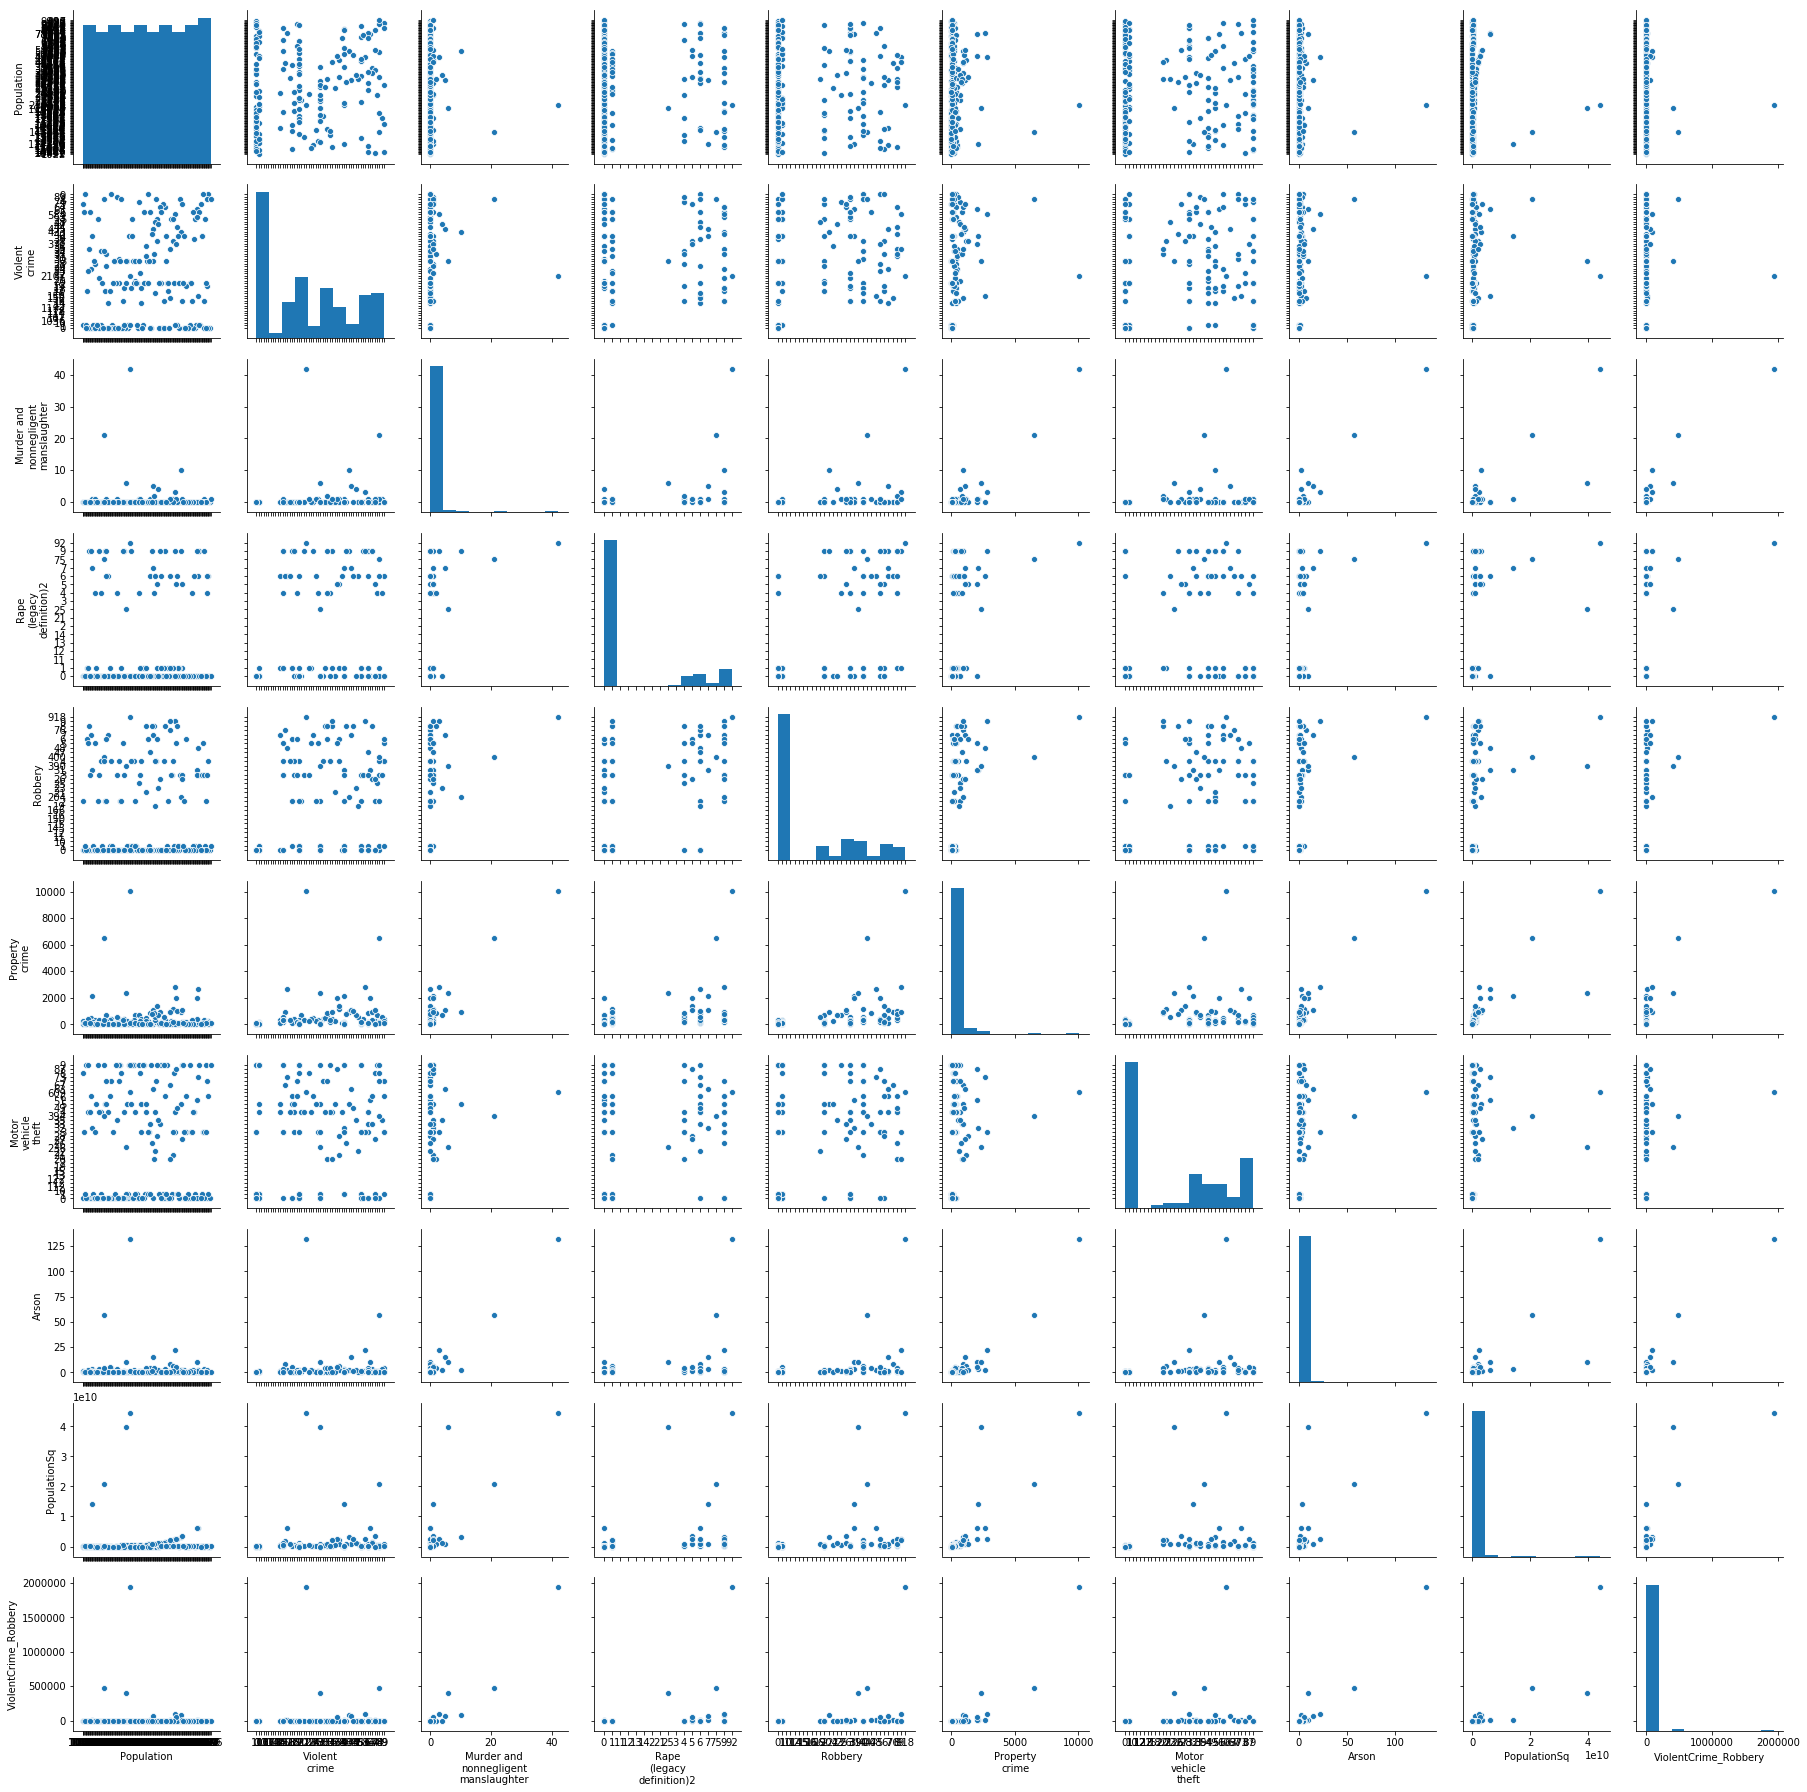

In [53]:
sns.pairplot(df)